# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.077206e+01     7.758237e+00
 * time: 0.0019259452819824219
     1     2.889408e+01     4.733546e+00
 * time: 0.00861215591430664
     2     2.227712e+01     8.041608e+00
 * time: 0.016571998596191406
     3     1.627580e+01     6.239469e+00
 * time: 0.024647951126098633
     4     1.300383e+01     3.395952e+00
 * time: 0.03246498107910156
     5     1.038226e+01     1.365049e+00
 * time: 0.03963613510131836
     6     9.781859e+00     2.160833e+00
 * time: 0.045465946197509766
     7     9.182411e+00     1.191420e+00
 * time: 0.050827980041503906
     8     8.670385e+00     1.084997e+00
 * time: 0.05612993240356445
     9     8.454951e+00     9.956989e-01
 * time: 0.06160712242126465
    10     8.283703e+00     1.044982e+00
 * time: 0.06727004051208496
    11     8.114947e+00     7.088439e-01
 * time: 0.07277512550354004
    12     8.112730e+00     9.911865e-01
 * time: 0.0771780014038086
    13     8.089981e+00     1.108964e+00
 * 

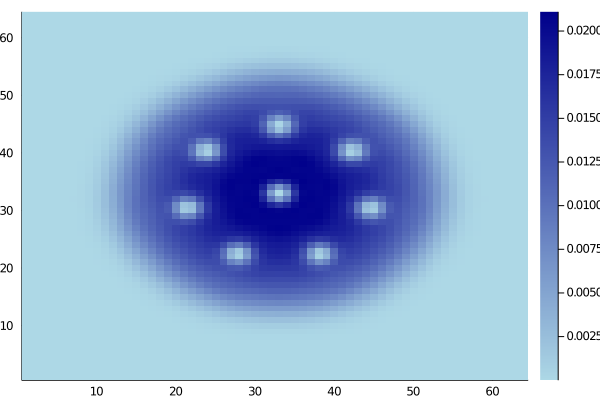

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)